# Introduction to Regression with Neural Netwroks with TensorFlow
 There are many definitions for a regression problem but in our case, we're going to simplify it : predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

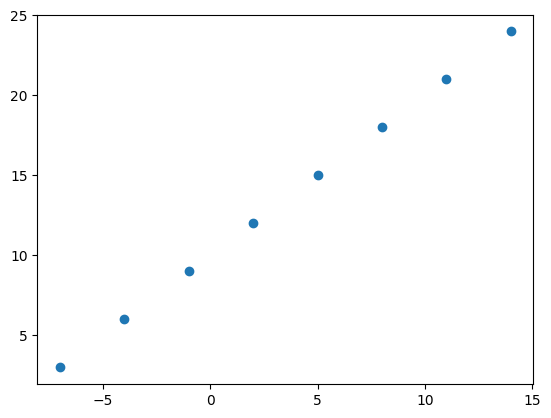

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [ ]:
# Note that here we get a relation between the data and labels , which is depicted below
# The following array gives true because it satisfies the relation between the data and labels
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price predicition problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

**Follow this syntax while fitting a model if the tensorflow version is 2.7.0+!**

In [ ]:
# Set random seed
tf.random.set_seed(69)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 962ms/step - loss: 8.5603 - mae: 8.5603
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 8.4278 - mae: 8.4278
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 8.2953 - mae: 8.2953
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 8.1628 - mae: 8.1628
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 8.0303 - mae: 8.0303


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction with our model # 1st try
model.predict([20.0])

1/1 [==============================] - 0s 191ms/step


array([[31.776941]], dtype=float32)

In [ ]:
# We see that our model is not perfect at giving right result  # 2nd try
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 59ms/step


array([[27.0179]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers , change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll have to train longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 9.8554 - mae: 9.8554
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7229 - mae: 9.7229
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5904 - mae: 9.5904
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.4579 - mae: 9.4579
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3254 - mae: 9.3254
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 9.1929 - mae: 9.1929
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.0604 - mae: 9.0604
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9279 - mae: 8.9279
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7954 - mae: 8.7954
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6629 - mae: 8.6629
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss

In [ ]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved
y_preds = model.predict([17.0])
y_preds

1/1 [==============================] - 0s 101ms/step


array([[29.805017]], dtype=float32)

In [ ]:
y_preds = model.predict([20.0])
y_preds

1/1 [==============================] - 0s 55ms/step


array([[34.923992]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve a model

# 1. Create the model (this time with an extra hidden layer with 100 natural units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 470ms/step - loss: 13.0731 - mae: 13.0731
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5602 - mae: 12.5602
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0518 - mae: 12.0518
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5444 - mae: 11.5444
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0232 - mae: 11.0232
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4843 - mae: 10.4843
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.9221 - mae: 9.9221
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3275 - mae: 9.3275
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6966 - mae: 8.6966
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0296 - mae: 8.0296
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y_preds = model.predict([17.0])
y_preds

1/1 [==============================] - 0s 127ms/step


array([[32.226368]], dtype=float32)

In [ ]:
# Let's see if we can make some more changes to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 natural units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 921ms/step - loss: 13.5175 - mae: 13.5175
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.4510 - mae: 13.4510
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 13.3845 - mae: 13.3845
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.3180 - mae: 13.3180
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.2514 - mae: 13.2514
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 13.1848 - mae: 13.1848
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1181 - mae: 13.1181
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0514 - mae: 13.0514
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9847 - mae: 12.9847
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9179 - mae: 12.9179
Epoch 11/100
1/1 [==============================

In [ ]:
y_preds = model.predict([17.0])
y_preds

1/1 [==============================] - 0s 145ms/step


array([[31.651329]], dtype=float32)

## Evaluating a model

In practice , a typical workflow you'll go through when building neural network is :     
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation ... there are 3 words you should memorize :
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the datasets
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

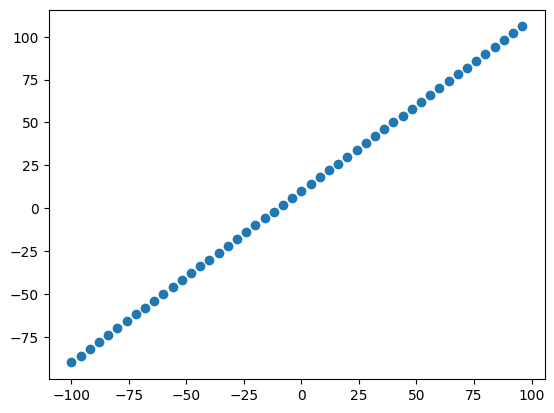

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* **Training set** - the model learns form this data (80-85%)
* **Validation set** - the model gets tuned on this data (10-15%)
* **Test set** - the model gets evaluated on this data (10-15%)

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training sample (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

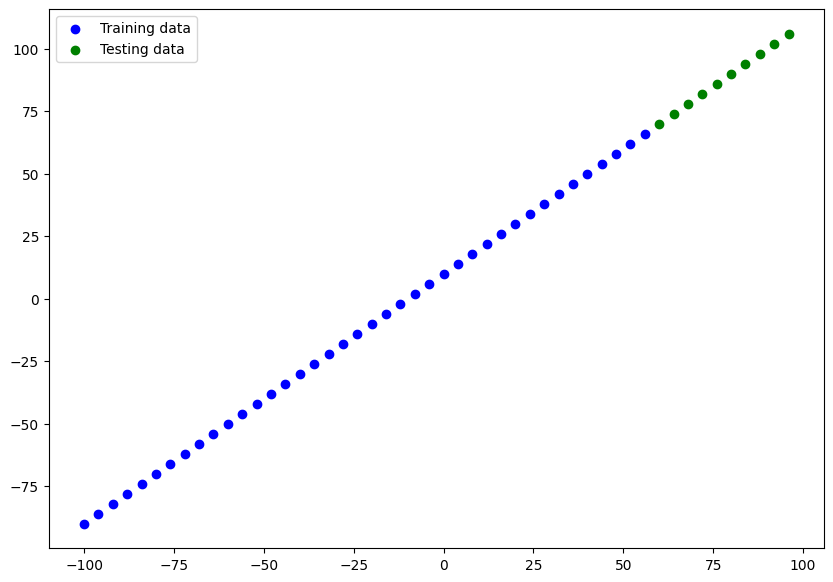

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Testing data")
# Show a legend
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fitting a model
# model.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs=100)
# Here , we are commenting this out because we want to determine the shape of the modelling even befor fitting the data

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(69)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer"),
], name = "sample_model_1")

# Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sample_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in the already learned patterns or parameters from other models during **transfer learning**).

📖 **Resources:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

In [ ]:
# Now , let's fit the model to the training data
model.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs=100, verbose=0)

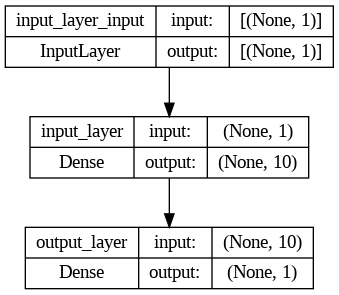

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions , it's a good idea to plot them against the ground truth levels.

Often we'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus our model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 76.5628  ],
       [ 81.54651 ],
       [ 86.53024 ],
       [ 91.51397 ],
       [ 96.497696],
       [101.48143 ],
       [106.46516 ],
       [111.44888 ],
       [116.43261 ],
       [121.416336]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note:** If you feel like you're going to use some functionality in the future, it's a good idea to turn that into a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", label= "Training Data")
  # Plot testing data in green
  plt.scatter(test_data, test_label, c="g", label = "Testing Data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")
  # Show the legend
  plt.legend();

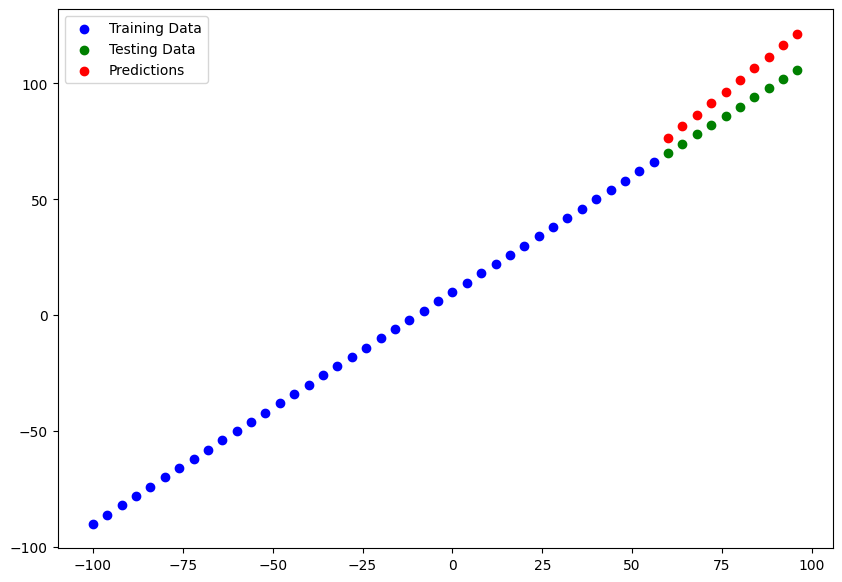

In [ ]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics :
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean squared error, "square the average errors"

In [ ]:
# Evaluate the mnodel on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 180ms/step - loss: 10.9896 - mae: 10.9896


[10.98956298828125, 10.98956298828125]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.262321 , 10.981397 , 10.       , 10.3027935, 11.799078 ,
       14.488858 , 18.465157 , 23.448883 , 28.432611 , 33.416336 ],
      dtype=float32)>

Earlier , we got only one value for mae , but now upon evaluating we find that the value of 'mae' is coming in the form of a tensor , which isn't right because it should have one constant value

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred.shape

(10, 1)

Note that the shapes of the y_test and y_pred are different , so in order to evaluate 'mae', we need to reshape the y_pred

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.5628  ,  81.54651 ,  86.53024 ,  91.51397 ,  96.497696,
       101.48143 , 106.46516 , 111.44888 , 116.43261 , 121.416336],
      dtype=float32)>

In [ ]:
# Now calculating mae again
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.989563>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=128.75418>

In [ ]:
# Make some functions to reuse mae & mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

## **Build** `model_1`

In [ ]:
# Set the random seed
tf.random.set_seed(69)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 49.9057 - mae: 49.9057
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 17.5741 - mae: 17.5741
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2349 - mae: 11.2349
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.3028 - mae: 13.3028
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 8.3894 - mae: 8.3894
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5250 - mae: 12.5250
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3097 - mae: 9.3097
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.2281 - mae: 9.2281
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4536 - mae: 9.4536
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 7.5020 - mae: 7.5020
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 73ms/step


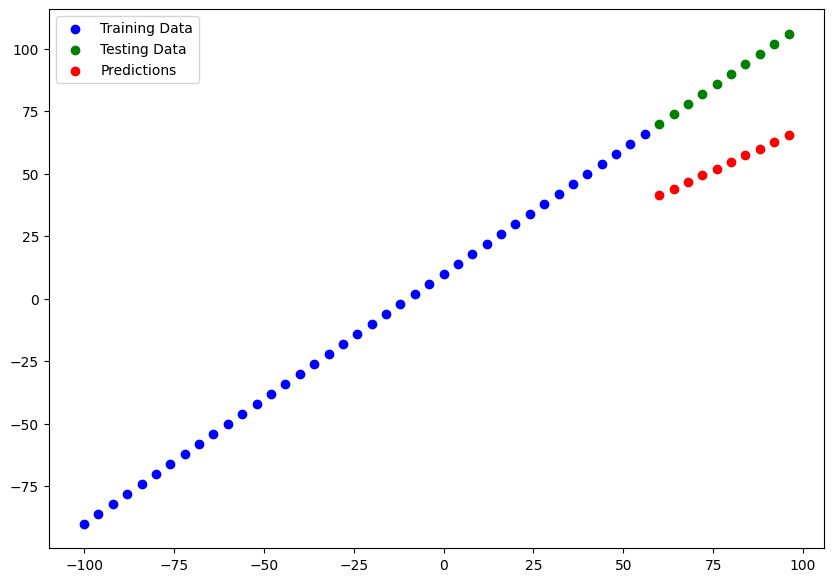

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics (from pre-created functions)
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=34.60984>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1212.4269>)

## **Build** `model_2`

* 2 Dense layers , trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(69)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 65.2540 - mse: 6690.1392
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 27.9753 - mse: 1148.1752
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6282 - mse: 155.5047
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5037 - mse: 113.1025
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 13.3369 - mse: 311.7372
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 19.9648 - mse: 497.4093
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 23.4345 - mse: 824.3182
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 14.6325 - mse: 318.9159
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 10.5468 - mse: 123.3392
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4880 - mse: 179.9840
Epoch 11/100
2/2 [============================

1/1 [==============================] - 0s 77ms/step


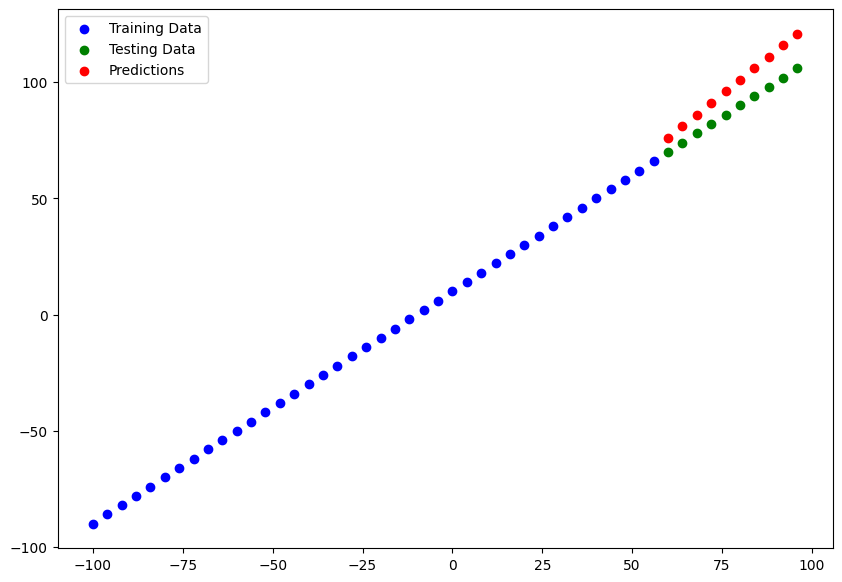

In [ ]:
# Make and plot predictions on model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.51362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=118.19517>)

## **Build** `model_3`

* 2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(69)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 14ms/step - loss: 37.9664 - mae: 37.9664
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 15.8518 - mae: 15.8518
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 16.1250 - mae: 16.1250
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 7.5348 - mae: 7.5348
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 13.5999 - mae: 13.5999
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 19.1475 - mae: 19.1475
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 23.0725 - mae: 23.0725
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 13.3313 - mae: 13.3313
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 11.1750 - mae: 11.1750
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 11.3384 - mae: 11.3384
Epoch 11/500
2/2 [==============================] - 0s 8

1/1 [==============================] - 0s 112ms/step


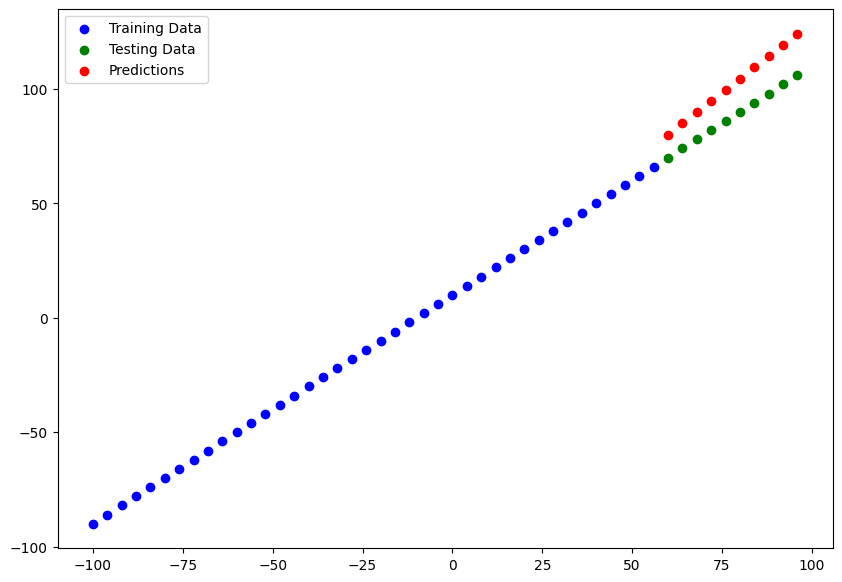

In [ ]:
# Plot the predictions for tyhe 3rd model
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# evaluation metrics for 3rd model
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=14.100736>,
 <tf.Tensor: shape=(), dtype=float32, numpy=205.42236>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using our pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae","mse"])
all_results

,model,mae,mse
0,model_1,34.609840,1212.426880
1,model_2,10.513620,118.195168
2,model_3,14.100736,205.422363


Looks like `model_2` performs the best...

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖**Resources:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (the good news for Weights & Biases is it plugs straight into TensorBoard).

## Saving our models

Saving our models allow us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 86ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Comparing model_2 predictions with loaded .h5 predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_format_preds = loaded_h5_format.predict(X_test)
model_2_preds == loaded_h5_format_preds

1/1 [==============================] - 0s 77ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Upon comparing MAE and MSE , we could also find that they are the same as compared to the model_2 and the reloaded models

## Download a model (or any other file) from Google Colab

If you want to download files from Google Colab:
1. Go to the "files" tab and right click on the file you'd like to download, and click "download".
2. Use code (see cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting to Google Drive)
# Using !cp

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
# Here , we are multiplying 1 in the first line because we want to convert true/false values to 0/1 in the dataframe
insurance_one_hot = pd.get_dummies(insurance)*1
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis =1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=69)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2)
tf.random.set_seed(69)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 12785.5049 - mae: 12785.5049
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11878.0801 - mae: 11878.0801
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11761.5889 - mae: 11761.5889
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11688.3701 - mae: 11688.3701
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11579.5713 - mae: 11579.5713
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11398.5332 - mae: 11398.5332
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11085.9600 - mae: 11085.9600
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 10584.1621 - mae: 10584.1621
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 9950.7295 - mae: 9950.7295
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9328.1934 

In [ ]:
# Check the results of insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 9637.0137 - mae: 9637.0137


[9637.013671875, 9637.013671875]

In [ ]:
y_train.median()

9121.3745

Right now , our model isn't performing too well . Let's try to improve it.

To (try) improve our model, we'll run 2 experiments :
1. Add an extra layer to our model
2. Train for longer
3. (Might be any other step)

In [ ]:
# Build a neural network (sort of like insurance_model) to improve it
tf.random.set_seed(69)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 12897.1680 - mae: 12897.1680
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12873.7705 - mae: 12873.7705
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12829.5176 - mae: 12829.5176
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.2402 - mae: 12749.2402
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12617.5430 - mae: 12617.5430
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 12425.4590 - mae: 12425.4590
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12182.6660 - mae: 12182.6660
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 11930.8652 - mae: 11930.8652
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 11752.5723 - mae: 11752.5723
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11692.48

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 9623.6523 - mae: 9623.6523


[9623.65234375, 9623.65234375]

In [ ]:
# Set random seed
tf.random.set_seed(69)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs =200)

Epoch 1/200
34/34 [==============================] - 2s 8ms/step - loss: 12894.5498 - mae: 12894.5498
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 12868.9404 - mae: 12868.9404
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 12821.5762 - mae: 12821.5762
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 12737.4746 - mae: 12737.4746
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 12600.8145 - mae: 12600.8145
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 12403.3311 - mae: 12403.3311
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 12158.6270 - mae: 12158.6270
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 11910.8320 - mae: 11910.8320
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 11745.2480 - mae: 11745.2480
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 11692.31

In [ ]:
# Evaluate our 3rd model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 9640.5781 - mae: 9640.5781


[9640.578125, 9640.578125]

Text(0.5, 0, 'epochs')

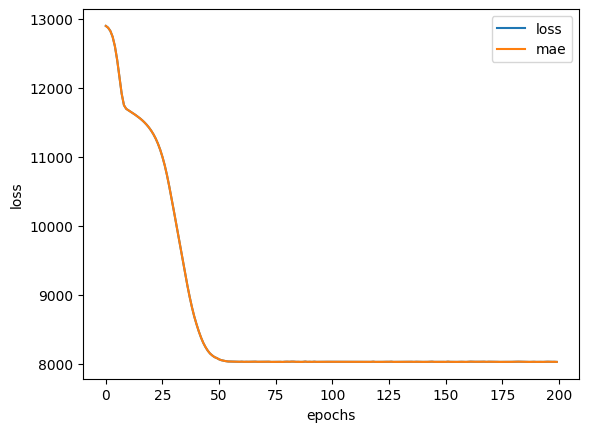

In [ ]:
# Plot history (also known as a plot curve or a training curve)
# The variable we assigned as history can be used with another function , also known as history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔**Question:** How long should you train for?

It depends on the problem you're working on. However, many people have asked this question before...so TensorFlow has a solution! It's called [the EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization & standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data for neural network modelling , we'll borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) #ignore means if there is any such column that the onehotencoder doesn't know about, just ignore it
)

# Create X and y
X = insurance.drop("charges", axis =1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.iloc[0]

age                58
sex              male
bmi            36.955
children            2
smoker            yes
region      northwest
Name: 55, dtype: object

In [ ]:
# What does our data look like now ?
X_train_normal[0]

array([0.86956522, 0.56483723, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape # The extra columns are generated due to OneHotEncoding

((1070, 6), (1070, 11))

Now our data has been normalized and onehotencoded , let's try to build a model on it .

In [ ]:
# Building a neural network model to fit on our normalised data

# Set random seed
tf.random.set_seed(69)

# Creating our model
normalised_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling our model
normalised_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# Fitting our model
normalised_model.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 12905.4248 - mae: 12905.4248
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12903.4805 - mae: 12903.4805
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12898.6084 - mae: 12898.6084
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12888.0195 - mae: 12888.0195
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 12868.6475 - mae: 12868.6475
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 12837.3555 - mae: 12837.3555
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12791.1582 - mae: 12791.1582
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12727.2793 - mae: 12727.2793
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12642.9775 - mae: 12642.9775
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 12535.61

In [ ]:
# Evaluate our model trained on normalized data
normalised_model.evaluate(X_train_normal, y_train)

34/34 [==============================] - 0s 3ms/step - loss: 8034.3569 - mae: 8034.3569


[8034.35693359375, 8034.35693359375]

In [ ]:
# Let's plot some of the columns in our data to check the data spread or the graphical representation
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

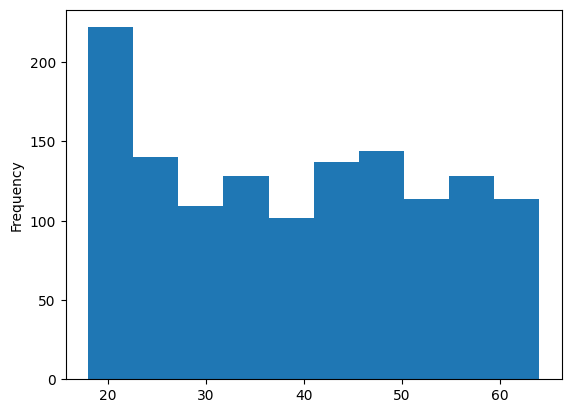

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

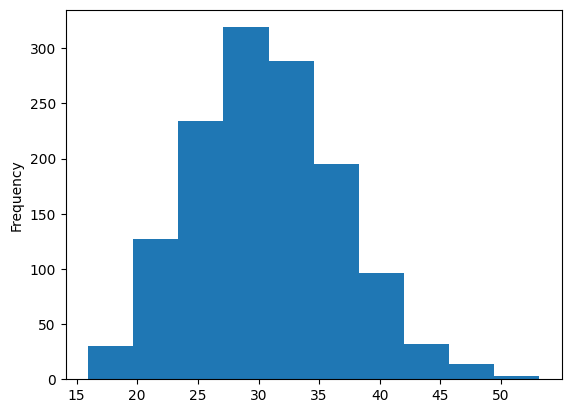

In [ ]:
X["bmi"].plot(kind="hist")

# **TensorFlow exercises** for Practice

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
X = np.array([1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0])
y = np.array([21.0, 23.0, 35.0, 27.0, 29.0, 31.0, 33.0, 35.0, 37.0, 39.0])
X,y

(array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19.]),
 array([21., 23., 35., 27., 29., 31., 33., 35., 37., 39.]))

In [ ]:
tf.random.set_seed(69)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(70),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 31.7017 - mae: 31.7017
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 29.1632 - mae: 29.1632
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 26.6323 - mae: 26.6323
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 24.0868 - mae: 24.0868
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 21.5003 - mae: 21.5003
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 18.8427 - mae: 18.8427
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 16.0834 - mae: 16.0834
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 13.1933 - mae: 13.1933
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 10.2162 - mae: 10.2162
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 9.1349 - mae: 9.1349
Epoch 11/200
1/1 [==============================] - 0s

In [ ]:
# Evaluating
model.predict([21.0])

1/1 [==============================] - 0s 115ms/step


array([[43.86788]], dtype=float32)

In [ ]:
# Importing insurance model
insurance_model = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_model

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance_model)*1
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 55     58  36.955         2           0         1          0           1   
 1334   18  31.920         0           1         0          1           0   
 852    46  35.530         0           1         0          0           1   
 738    23  31.730         3           0         1          0           1   
 1132   57  40.280         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 404    31  20.400         0           0         1          1           0   
 439    26  29.450         0           0         1          1           0   
 619    55  37.100         0           1         0          1           0   
 1227   42  37.180         2           0         1          1           0   
 1078   28  31.680         0           0         1          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
tf.random.set_seed(69)

insurance_model_S = tf.keras.Sequential([
    #tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

insurance_model_S.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

insurance_model_S.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 12340.1396 - mae: 12340.1396
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 11535.4678 - mae: 11535.4678
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 10376.6387 - mae: 10376.6387
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 8293.3037 - mae: 8293.3037
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 8040.8354 - mae: 8040.8354
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 8086.1709 - mae: 8086.1709
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8047.0850 - mae: 8047.0850
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 8038.4497 - mae: 8038.4497
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 8036.3354 - mae: 8036.3354
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 8047.2227 - mae: 804

In [ ]:
# Importing the boston housing dataset
Boston_pricing = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz')
Boston_pricing

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.